# I. Import Libraries and Data

Questions for Dr. Sánchez Becerra
1. Should I clean all fields of the data or just the ones I am going to use? For example, if I'm not planning on using the milliseconds field in the results table, do I still need to convert it to the correct data type? What about missing values?
2. How thorough do my checks for data cleaning and validation need to be? For example, in the races table, can I assume that the values in the year column match the year specified in the date column?
    Should I have checks for every new table I create?

5. Should I check for outliers before or after the data is filtered and aggregated? For example, if I am using the points field in the results table but aggregating it across constructors and only for specific years, should I look at the point outliers of my new table or the original results table or both?

7. Structure of code
8. What was it that we should comment out vs. what we should show in our submission?



Make code more concise 
- Get rid of cleaning variables that I am not using 
- Don't need to print dtypes or .describe()
- Make use of lists/dictionaries instead of printing loads
- Add a title
- Add 3 bullet points of top findings 
- Make code more readable (e.g., dont just print out empty dataframe)
- Don't need to check for duplicates for all - could just say "no duplicates found" 
- Dont break out by table, break out by check 
- Format results tables 


Questions: 
- Needed data
- Steps 
- Table
- Visualization
- Findings 

### Key Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

### Read Datasets

To answer questions a-e, I know that I need the following fields from the following tables:
results:
raceId, driverId, constructorId, number, positionOrder, points, fastestLapTime, rank
races: raceId, year, 
constructors: 

In [67]:
import os 
base_dir = os.getcwd()
#"/Users/gracebarringer/qtm530fall2024/Lecture 03/data_raw" # 

import os 
base_dir = os.getcwd()
file_path = os.path.normpath(os.path.join(base_dir, "../../", "Lecture 03/data_raw/"))


results_file_path = os.path.join(file_path, "results.csv")
races_file_path = os.path.join(file_path, "races.csv")
constructors_file_path = os.path.join(file_path, "constructors.csv")
drivers_file_path = os.path.join(file_path, "drivers.csv")


results = pd.read_csv(results_file_path)
races = pd.read_csv(races_file_path)
constructors = pd.read_csv(constructors_file_path)
drivers = pd.read_csv(drivers_file_path)



# II. Cleaning Data 

In [68]:
# Lists of fields I will be using from each data source
results_cols = ['resultId', 'raceId', 'driverId', 'constructorId', 'positionOrder', 'points', 'fastestLapTime', 'fastestLapSpeed']
races_cols = ['raceId', 'year']
constructors_cols = ['constructorId', 'name']
drivers_cols = ['driverId', 'forename', 'surname']

For each table I will be using for the analysis, I want to conduct a few basic checks: \
&emsp;&emsp;1.\) Check for correct data types \
&emsp;&emsp;2.\) Check for duplicates \
&emsp;&emsp;3.\) Check for missing values \
&emsp;&emsp;4.\) Check for join integrity

##### 1.\) Checking for correct data types

In [69]:
# Checking to ensure the data types match what's expected 
# Only for fields I will be using 
display(results[results_cols].dtypes)
display(races[races_cols].dtypes)
display(constructors[constructors_cols].dtypes)
display(drivers[drivers_cols].dtypes)

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
positionOrder        int64
points             float64
fastestLapTime      object
fastestLapSpeed     object
dtype: object

raceId    int64
year      int64
dtype: object

constructorId     int64
name             object
dtype: object

driverId     int64
forename    object
surname     object
dtype: object

***Findings***
- For each table, all used fields match the data types in the F1 codebook 
- fastestLapTime and fastestLapSpeed in the results table are objects. I want to look at them when determining Ferrari's best year so I am going to covert them into integers 

In [70]:
# # convert \\N to nan
results["fastestLapTime"] = results["fastestLapTime"].replace('\\N', np.nan)
# # split time 
# time_split = results['fastestLapTime_test'].str.split(':', expand=True)
# print(time_split)
# # results['test'] = pd.to_datetime(results['fastestLapTime_test'])
# # display(results)

results["fastestLapSpeed"] = results["fastestLapSpeed"].replace('\\N', np.nan)



In [196]:
# # Convert the 'time' column to milliseconds
results['time_in_milliseconds'] = results['fastestLapTime'].apply(lambda time_str: 
                                              (int(time_str.split(":")[0]) * 60 * 1000) +  # Minutes to milliseconds
                                              (int(time_str.split(":")[1].split(".")[0]) * 1000) +  # Seconds to milliseconds
                                              (int(time_str.split(":")[1].split(".")[1])))  # Milliseconds

# print(results.dtypes)
display(results)


AttributeError: 'float' object has no attribute 'split'

##### 2.\) Checking for duplicates 

In [71]:
# Checking for duplicate records in results table - every record should be unique
results_duplicates = results[results.duplicated()]

# Checking for unique raceId in the races table - each record should represent a unique raceId 
# It is important for raceId to be unique because I will be using it to join year to the results table 
raceId_duplicates = races[races['raceId'].duplicated()]

# Checking for unique constructorId in constructors table - each record should represent a unique constructorId
# It is important for constructorId to be unique because I will be using it to join constructor name to the results table 
contructorId_duplicates = constructors[constructors['constructorId'].duplicated()]

# Checking for unique name in constructors table - ensuring name formatting is consistent 
# To ensure no duplicate names, I need to normalize the name values to ensure that duplicate names are recognized if they exist
constructors['normalizedName'] = constructors['name'].str.lower().str.strip()
constructorName_duplicates = constructors[constructors['normalizedName'].duplicated()]


# Checking for unique driverId in the drivers table - each record should represent a unique driverId
# It is important for driverId to be unique because I will be using it to join driver name to the results table 
driverId_duplicates = drivers[drivers['driverId'].duplicated()]

# Checking for unique driver names in drivers table - ensuring name formatting is consistent 
# To ensure no duplicate driver names, I need combine forename and surname then 
# normalize the values to ensure that duplicate names are recognized if they exist
drivers['fullName'] = drivers['forename'] + " " + drivers['surname']
drivers['normalizedfullName'] = drivers['fullName'].str.lower().str.strip()
driverName_duplicates = drivers[drivers['normalizedfullName'].duplicated()]

duplicate_dict = {'Table Name': ['results', 'races', 'constructors', 'constructors', 'drivers', 'drivers'],
                  'Duplicate Check': ['All Records', 'Race ID', 'Constructor ID', 'Constructor Name', 'Driver ID', 'Driver Full Name'],
                  'Duplicate Count': [len(results_duplicates), len(raceId_duplicates), len(contructorId_duplicates), len(constructorName_duplicates), len(driverId_duplicates), len(driverName_duplicates)]
}

duplicates = pd.DataFrame(duplicate_dict)

display(duplicates)


,Table Name,Duplicate Check,Duplicate Count
0,results,All Records,0
1,races,Race ID,0
2,constructors,Constructor ID,0
3,constructors,Constructor Name,0
4,drivers,Driver ID,0
5,drivers,Driver Full Name,0


There are no duplicates in the unique IDs and records I will be using

##### 3.\) Checking for missing values

In [72]:
results_missing_count = results[results_cols].isna().sum()
results_missing_share = ((results[results_cols].isna().sum()/results.shape[0])*100).round(0).astype(int)
results_missing_table = pd.DataFrame({
    'Missing Count': results_missing_count,
    'Missing Share (%)': results_missing_share
})

races_missing_count = races[races_cols].isna().sum()
races_missing_share = ((races[races_cols].isna().sum()/races.shape[0])*100).round(0).astype(int)
races_missing_table = pd.DataFrame({
    'Missing Count': races_missing_count,
    'Missing Share (%)': races_missing_share
})

constructors_missing_count = constructors[constructors_cols].isna().sum()
constructors_missing_share = ((constructors[constructors_cols].isna().sum()/constructors.shape[0])*100).round(0).astype(int)
constructors_missing_table = pd.DataFrame({
    'Missing Count': constructors_missing_count,
    'Missing Share (%)': constructors_missing_share
})

drivers_missing_count = drivers[drivers_cols].isna().sum()
drivers_missing_share = ((drivers[drivers_cols].isna().sum()/drivers.shape[0])*100).round(0).astype(int)
drivers_missing_table = pd.DataFrame({
    'Missing Count': drivers_missing_count,
    'Missing Share (%)': drivers_missing_share
})


display(results_missing_table)
display(races_missing_table)
display(constructors_missing_table)
display(drivers_missing_table)


,Missing Count,Missing Share (%)
resultId,0,0
raceId,0,0
driverId,0,0
constructorId,0,0
positionOrder,0,0
points,0,0
fastestLapTime,18461,71
fastestLapSpeed,18461,71


,Missing Count,Missing Share (%)
raceId,0,0
year,0,0


,Missing Count,Missing Share (%)
constructorId,0,0
name,0,0


,Missing Count,Missing Share (%)
driverId,0,0
forename,0,0
surname,0,0


***Findings***
- For each table except results, no fields have missing values 
- In the results table, fastestLapTime and fastestLapSpeed each are missing 71% of all values - in the later section I will see how these numbers look when querying for just Ferrari between 1981 and 2020

#### 4.\) Checking for join integrity 

In order to answer the questions in the homework, I will need to joins to pull in needed fields into the results table. 
- Questions a, b, and c: 
    - Pulling in year from the races table into the results table joining on raceId
        - Need to ensure that there are no raceIds in the results table that are not in the races table. 
    - Pulling name from the constructors table into the results table joining on constructorId
        - Need to ensure that there are no constructorIds in the results table that are not in the constructors table
- Question 


In [73]:
# Checking that all raceIds in the results table are in the races table 
missing_raceId = results[~results['raceId'].isin(races['raceId'])]
if missing_raceId.empty:
    print("All raceId values in the results table are in the races table")
else:
    print("There are raceId values in the results table that are not in the races table")

# Checking that all constructorIds in the results table are in the constructors table 
missing_constructorId = results[~results['constructorId'].isin(constructors['constructorId'])]
if missing_constructorId.empty:
    print("All constructorId values in the results table are in the constructors table")
else:
    print("There are constructorId values in the results table that are not in the constructors table")


All raceId values in the results table are in the races table
All constructorId values in the results table are in the constructors table


# III. Questions and Answers


## Question a

**Data Required**
- *results table:* raceId, constructorId, points
- *races table:* raceId, year
- *constructors table:* constructorId, name

**Methodology**
- Merge the races table to the results table on raceId to pull the year into the results table
- Merge the constructor table to the results table on constructorId to pull the name (constructor name) into the results table
- Aggregate the points by constructorId, name, and year 
- Filter to only years between 1981 and 2020, sum the points and count distinct years by constructorId and name (don't really need both)
- Verify merges and filters occured correctly 


#### Creating dataset

In [107]:
# Pulling year into results data using a join on raceId and selecting only needed columns 
results_merged_constructor = pd.merge(results[['raceId', 'constructorId', 'points']],
                       races[["raceId", "year"]],
                       on = "raceId",
                       how = "left")

# Pulling in constructor name from the constructors table 
results_merged_constructor = pd.merge(results_merged_constructor, constructors[['constructorId', 'name']], 
                          on = "constructorId",
                          how = "left")

# Created new dataframe with constructor points by year 
constructors_points_year = (results_merged_constructor.groupby(["constructorId", "name", "year"]).agg(points_by_year = ('points','sum'))).reset_index()


# Querying for just years between 1981 and 2020, aggregating points by constructorId, and sorting by total points by constructor 
# Note: I am also getting the number of distinct years that each constructor competed during the time frame 
constructor_points_1981_2020 = (constructors_points_year.query("(year >= 1981) & (year <= 2020)").groupby(["constructorId", "name"]).agg(total_points_1981_2020 = ('points_by_year','sum'), distinct_years = ('year', 'nunique')).sort_values(by = 'total_points_1981_2020', ascending = False)).reset_index()


#### Verification Checks

In [75]:
# Ensure that no data was lost, gained or altered during the join by comparing the descriptive statistics of results_merged_constructor to those of results
display(results[['raceId', 'constructorId', 'positionOrder', 'points']].describe())
display(results_merged_constructor.describe())

,raceId,constructorId,driverId,positionOrder,points
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,531.425813,48.628328,261.732082,12.876006,1.877053
std,299.440908,59.732131,268.623016,7.712391,4.169849
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,293.000000,6.000000,56.000000,6.000000,0.000000
50%,514.000000,25.000000,163.000000,12.000000,0.000000
75%,784.000000,58.000000,360.000000,18.000000,2.000000
max,1096.000000,214.000000,856.000000,39.000000,50.000000


,raceId,constructorId,driverId,positionOrder,points,year
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,531.425813,48.628328,261.732082,12.876006,1.877053,1990.251780
std,299.440908,59.732131,268.623016,7.712391,4.169849,19.345632
min,1.000000,1.000000,1.000000,1.000000,0.000000,1950.000000
25%,293.000000,6.000000,56.000000,6.000000,0.000000,1976.000000
50%,514.000000,25.000000,163.000000,12.000000,0.000000,1990.000000
75%,784.000000,58.000000,360.000000,18.000000,2.000000,2007.000000
max,1096.000000,214.000000,856.000000,39.000000,50.000000,2022.000000


In [76]:
# Ensure row count in results_merged_constructor is the same as the results table
if results.shape[0] == results_merged_constructor.shape[0]:
    print('Merged row check passed')
else:
    print('Merged row check failed')


# Ensuring we have the correct number of rows after filtering
# During the time period 1981 and 2020, I would expect the number of constructors to be computed by this: 
constructor_count_1981_2020 = results_merged_constructor.query("(year >= 1981) & (year <= 2020)")['constructorId'].nunique()
# Since the constructor_points_1981_2020 table is aggregated at the constructor level, I expect that the number of rows in that table should be equal to constructor_count_1981_2020
if constructor_count_1981_2020 == constructor_points_1981_2020.shape[0]:
    print('Query/Aggregation row check passed')
else:
    print('Query/Aggregation row check failed')

# Check for missing data 
results_merged_constructor.isnull().sum()

Merged row check passed
Query/Aggregation row check passed


raceId                0
constructorId         0
driverId              0
positionOrder         0
points                0
fastestLapTime    18461
rank                  0
year                  0
name                  0
dtype: int64

**Verification Checks**
- The new tables seem to have the correct number of rows and are not many any values

#### Results and Visualizations 

In [77]:
# Getting the names of the top 3 constructors to compute the average 
top_3_constructor_1981_2020 = constructor_points_1981_2020.iloc[0:3,:]['name']

# Getting the average total points between 1981 and 2020 for top 3 constructors 
top_3_avg_total_points_1981_2020 = constructor_points_1981_2020[constructor_points_1981_2020['name'].isin(top_3_constructor_1981_2020)]['total_points_1981_2020'].mean()

# Clean up column names and format
constructor_points_1981_2020_clean = constructor_points_1981_2020.rename(columns={
    'name': 'Constructor Name',
    'total_points_1981_2020': 'Total Points (1981-2020)',
    'distinct_years': 'Years Competed (1981-2020)'
}).drop(columns = ['constructorId'])
constructor_points_1981_2020_clean['Total Points (1981-2020)'] = constructor_points_1981_2020_clean['Total Points (1981-2020)'].round(0).astype(int)

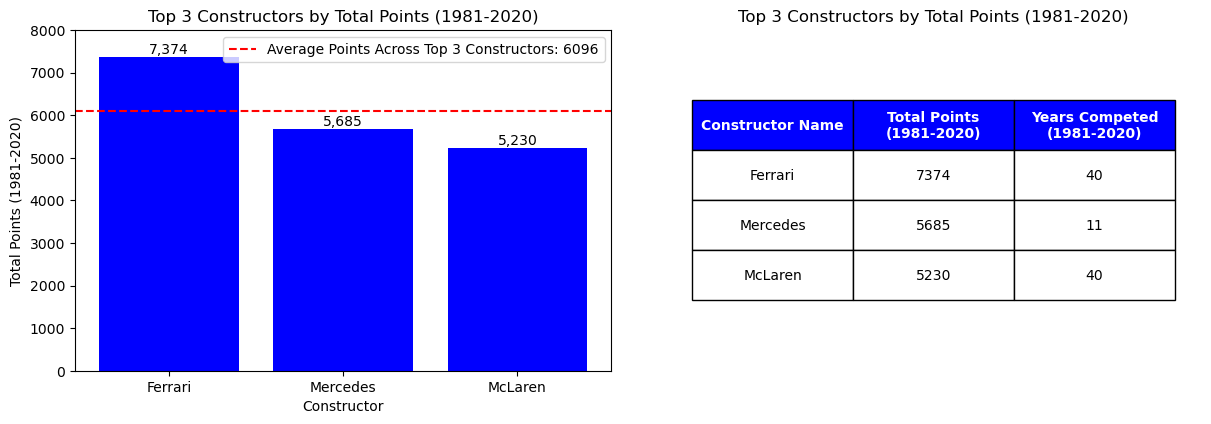

In [78]:
# Creating a plot with 1 row, 2 columns
fig, list_subfig = plt.subplots(1, 2,figsize = (12,4))

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

# First Subfigure (Bar Chart for Top 3 Constructors 1981 - 2020)
bars = list_subfig[0].bar(constructor_points_1981_2020_clean.iloc[0:3,:]['Constructor Name'], constructor_points_1981_2020_clean.iloc[0:3,:]['Total Points (1981-2020)'], color='blue')
list_subfig[0].axhline(y=top_3_avg_total_points_1981_2020, color='red', linestyle='--', label=f'Average Points Across Top 3 Constructors: {top_3_avg_total_points_1981_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    list_subfig[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

list_subfig[0].set_xlabel('Constructor')
list_subfig[0].set_ylabel('Total Points (1981-2020)')
list_subfig[0].set_title('Top 3 Constructors by Total Points (1981-2020)')
list_subfig[0].set_ylim(0, 8000)
list_subfig[0].legend()


# Second Subfigure (Table for Top 3 Constructors 1981 - 2020)

#Formatting column headers 
constructor_points_1981_2020_clean_wrapped = ['Constructor Name', 'Total Points\n(1981-2020)', 'Years Competed\n(1981-2020)']


table = list_subfig[1].table(cellText=constructor_points_1981_2020_clean.iloc[0:3, :].values, 
                  colLabels=constructor_points_1981_2020_clean_wrapped, 
                  loc='center', cellLoc='center')

table.scale(0.9, 3)  # Adjust table size
list_subfig[1].axis('off')
list_subfig[1].set_title('Top 3 Constructors by Total Points (1981-2020)')


# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10) 

# Loop through each cell and apply formatting
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor('blue')  
        cell.set_text_props(color='white', weight='bold', fontsize=10)  
    else:  
        pass
    cell.set_edgecolor('black')  


**Answers:**
- Ferrari, Mercedes, and McLaren had the highest number of total points between 1981 and 2020

- Between 1981 and 2020, Ferrari got 7,374 total points, Mercedes got 5,685 total points, and McLaren got 5,230 total points (5,229.5)

- As shown in the bar chart above, both Mercedes and McLaren are below the average of the top 3 indicating that Ferrari dominates in terms of total points accumulated between 1981 and 2020, though Mercedes and McLaren are still strong performers. Also, between 1981 and 2020, mercedes only competed for 11 years while Ferrari and McLaren both competed for all 40 years. 

## Question b

**Data Required**
- *Same as question a*

**Methodology**
- Use the constructors_points_year dataframe from question a to filter to years between 2001 and 2020
- Sum the points and count distinct years by constructorId and name
- Sort by total points in descending order 
- Verify that aggregation doesn't raise issues

#### Creating dataset

In [79]:
# Querying for just years between 2001 and 2020, aggregating points by constructorId, and sorting by total points by constructor 
# Note: I am also getting the number of distinct years that each constructor competed during the time frame 
constructor_points_2001_2020 = (constructors_points_year.query("(year >= 2001) & (year <= 2020)")
                                .groupby(["constructorId", "name"])
                                .agg(total_points_2001_2020 = ('points_by_year','sum'), distinct_years = ('year', 'nunique'))
                                .sort_values(by = 'total_points_2001_2020', ascending = False)).reset_index()


#### Verification Checks

In [80]:
# Ensuring we have the correct number of rows after filtering
constructor_count_2001_2020 = results_merged_constructor.query("(year >= 2001) & (year <= 2020)")['constructorId'].nunique()

if constructor_count_2001_2020 == constructor_points_2001_2020.shape[0]:
    print('Query/Aggregation row check passed')
else:
    print('Query/Aggregation row check failed')


# Check for missing data 
constructor_points_2001_2020.isnull().sum()

Query/Aggregation row check passed


constructorId             0
name                      0
total_points_2001_2020    0
distinct_years            0
dtype: int64

**Verification Checks**
- xxxxx

#### Results and Visualizations 

In [81]:
# Getting the names of the top 3 constructors to compute the average 
top_3_constructor_2001_2020 = constructor_points_2001_2020.iloc[0:3,:]['name']

# Getting the average total points between 1981 and 2020 for top 3 constructors 
top_3_avg_total_points_2001_2020 = constructor_points_2001_2020[constructor_points_2001_2020['name'].isin(top_3_constructor_2001_2020)]['total_points_2001_2020'].mean()

# Clean up column names and format
constructor_points_2001_2020_clean = constructor_points_2001_2020.rename(columns={
    'name': 'Constructor Name',
    'total_points_2001_2020': 'Total Points (2001-2020)',
    'distinct_years': 'Years Competed (2001-2020)'
}).drop(columns = ['constructorId'])

constructor_points_2001_2020_clean['Total Points (2001-2020)'] = constructor_points_2001_2020_clean['Total Points (2001-2020)'].round(0).astype(int)

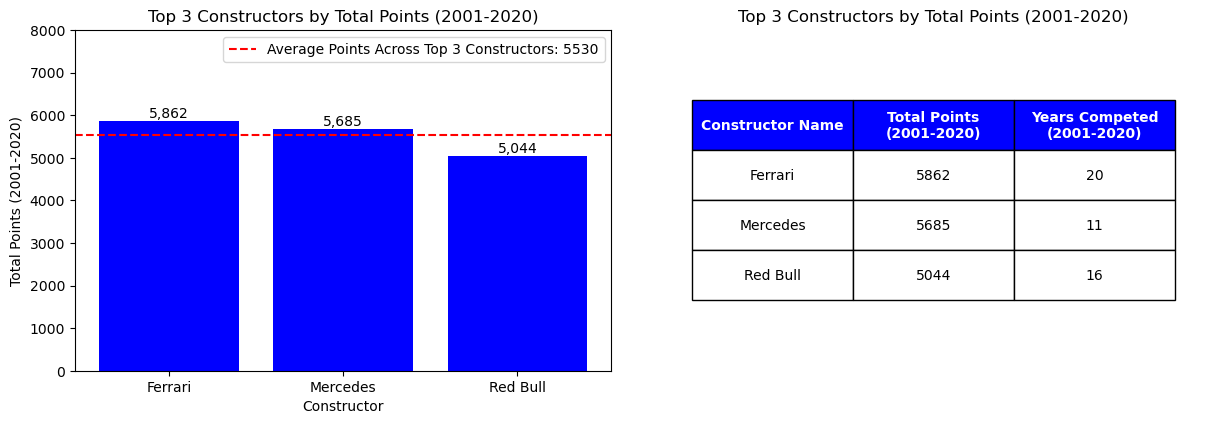

In [82]:
# Creating a plot with 1 row, 2 columns
fig, list_subfig = plt.subplots(1, 2,figsize = (12,4))

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

# First Subfigure (Bar Chart for Top 3 Constructors 2001 - 2020)
bars = list_subfig[0].bar(constructor_points_2001_2020_clean.iloc[0:3,:]['Constructor Name'], constructor_points_2001_2020_clean.iloc[0:3,:]['Total Points (2001-2020)'], color='blue')
list_subfig[0].axhline(y=top_3_avg_total_points_2001_2020, color='red', linestyle='--', label=f'Average Points Across Top 3 Constructors: {top_3_avg_total_points_2001_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    list_subfig[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

list_subfig[0].set_xlabel('Constructor')
list_subfig[0].set_ylabel('Total Points (2001-2020)')
list_subfig[0].set_title('Top 3 Constructors by Total Points (2001-2020)')
list_subfig[0].set_ylim(0, 8000)
list_subfig[0].legend()


# Second Subfigure (Table for Top 3 Constructors 2001 - 2020)

#Formatting column headers 
constructor_points_2001_2020_clean_wrapped = ['Constructor Name', 'Total Points\n(2001-2020)', 'Years Competed\n(2001-2020)']


table = list_subfig[1].table(cellText=constructor_points_2001_2020_clean.iloc[0:3, :].values, 
                  colLabels=constructor_points_2001_2020_clean_wrapped, 
                  loc='center', cellLoc='center')

table.scale(0.9, 3)  # Adjust table size
list_subfig[1].axis('off')
list_subfig[1].set_title('Top 3 Constructors by Total Points (2001-2020)')


# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10) 

# Loop through each cell and apply formatting
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor('blue')  
        cell.set_text_props(color='white', weight='bold', fontsize=10)  
    else:  
        pass
    cell.set_edgecolor('black')  

plt.show()


**Answers:**
- Ferrari, Mercedes, and Red Bull had the highest number of total points between 2001 and 2020

- Between 2001 and 2020, Ferrari got 5,862 total points, Mercedes got 5,685 total points, and Red Bull got 5,004 total points; note that Mercedes has the same number of total points between 1981 and 2020, and between 2001 and 2020 because within those time periods, they only started racing from 2010 onwards.

- As shown in the bar chart above, both Ferrari and Mercedes are above the average total points for the top 3 indicating the close competition between them in this period. Red bull is slightly below average but is still a strong competitor. Ferrari has also been racing for more years during this time period than the other constructors. 

## Question c

**Data Required**
- *Same as question a and b*

**Methodology**
- Compare output tables and bar charts from questions a and b

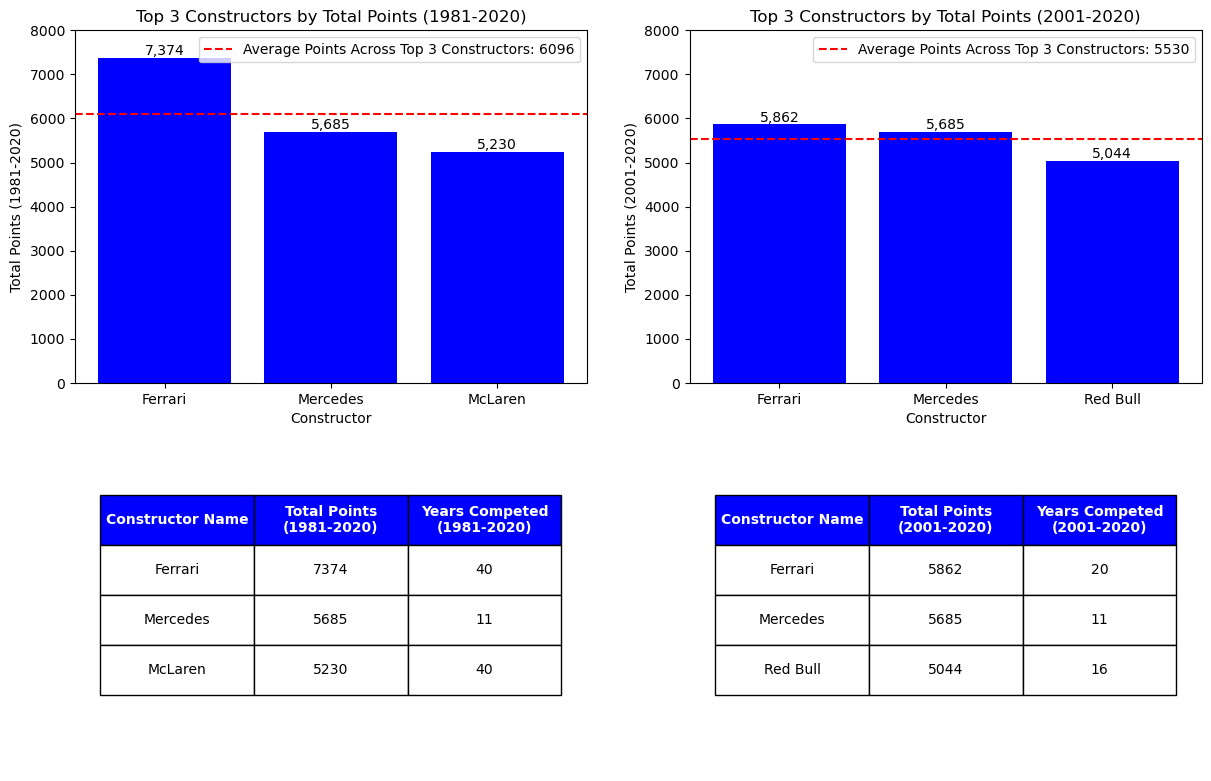

In [97]:
# Creating a plot with 2 row, 2 columns
fig, list_subfig = plt.subplots(2, 2,figsize = (12,8))

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace = 0.1)

# First Subfigure (Bar Chart for Top 3 Constructors 1981 - 2020)
bars = list_subfig[0, 0].bar(constructor_points_1981_2020_clean.iloc[0:3,:]['Constructor Name'], constructor_points_1981_2020_clean.iloc[0:3,:]['Total Points (1981-2020)'], color='blue')
list_subfig[0, 0].axhline(y=top_3_avg_total_points_1981_2020, color='red', linestyle='--', label=f'Average Points Across Top 3 Constructors: {top_3_avg_total_points_1981_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    list_subfig[0, 0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

list_subfig[0, 0].set_xlabel('Constructor')
list_subfig[0, 0].set_ylabel('Total Points (1981-2020)')
list_subfig[0, 0].set_title('Top 3 Constructors by Total Points (1981-2020)')
list_subfig[0, 0].set_ylim(0, 8000)
list_subfig[0, 0].legend()

# Second Subfigure (Bar Chart for Top 3 Constructors 2001 - 2020)
bars = list_subfig[0, 1].bar(constructor_points_2001_2020_clean.iloc[0:3,:]['Constructor Name'], constructor_points_2001_2020_clean.iloc[0:3,:]['Total Points (2001-2020)'], color='blue')
list_subfig[0, 1].axhline(y=top_3_avg_total_points_2001_2020, color='red', linestyle='--', label=f'Average Points Across Top 3 Constructors: {top_3_avg_total_points_2001_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    list_subfig[0, 1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

list_subfig[0, 1].set_xlabel('Constructor')
list_subfig[0, 1].set_ylabel('Total Points (2001-2020)')
list_subfig[0, 1].set_title('Top 3 Constructors by Total Points (2001-2020)')
list_subfig[0, 1].set_ylim(0, 8000)
list_subfig[0, 1].legend()


# Third Subfigure (Table for Top 3 Constructors 1981 - 2020)

#Formatting column headers 
constructor_points_1981_2020_clean_wrapped = ['Constructor Name', 'Total Points\n(1981-2020)', 'Years Competed\n(1981-2020)']

table = list_subfig[1, 0].table(cellText=constructor_points_1981_2020_clean.iloc[0:3, :].values, 
                  colLabels=constructor_points_1981_2020_clean_wrapped, 
                  loc='center', cellLoc='center')

table.scale(0.9, 3)  # Adjust table size
list_subfig[1, 0].axis('off')
# list_subfig[1, 0].set_title('Top 3 Constructors by Total Points (1981-2020)')

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10) 

# Loop through each cell and apply formatting
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor('blue')  
        cell.set_text_props(color='white', weight='bold', fontsize=10)  
    else:  
        pass
    cell.set_edgecolor('black')  



# Fourth Subfigure (Table for Top 3 Constructors 2001 - 2020)

#Formatting column headers 
constructor_points_2001_2020_clean_wrapped = ['Constructor Name', 'Total Points\n(2001-2020)', 'Years Competed\n(2001-2020)']

table = list_subfig[1, 1].table(cellText=constructor_points_2001_2020_clean.iloc[0:3, :].values, 
                  colLabels=constructor_points_2001_2020_clean_wrapped, 
                  loc='center', cellLoc='center')

table.scale(0.9, 3)  # Adjust table size
list_subfig[1, 1].axis('off')
# list_subfig[1, 1].set_title('Top 3 Constructors by Total Points (2001-2020)')


# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10) 

# Loop through each cell and apply formatting
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor('blue')  
        cell.set_text_props(color='white', weight='bold', fontsize=10)  
    else:  
        pass
    cell.set_edgecolor('black')  

plt.show()

**Answers:**
- McLaren dropped out of the top three during the 2001-2020 time period, while Red Bull entered the top 3 taking 3rd place. 

- Ferrari remained the top constructor between both time periods, though they appear to be less dominant in the 2001-2020 time period.

- Mercedes' total points remained the same between both time periods because they only started competing in 2010, which makes sense why the gap of total points from Ferrari decreased in the 2001-2020 time period since the number of years competing between the two constructors are becoming more similar.

## Question d

**Data Required**
- *results table:* raceId, constructorId, driverId
- *races table:* raceId, year
- *constructors table:* constructorId, name
- *drivers table:* driverId, fullName (created variable)

**Methodology**
- Merge the races table to the results table on raceId to pull the year into the results table
- Merge the constructor table to the results table on constructorId to pull the name (constructor name) into the results table
- Merge the drivers table to the results table on driverId to pull in the fullName (driver name) into the results table 
- Filter to only years between 1981 and 2020
- Verify merges and filters occured correctly 

#### Creating dataset

In [100]:
# Pulling year into results data using a join on raceId and selecting only needed columns 
results_merged_driver = pd.merge(results[['raceId', 'constructorId', 'driverId']],
                       races[["raceId", "year"]],
                       on = "raceId",
                       how = "left")

# Pulling in constructor name from the constructors table 
results_merged_driver = pd.merge(results_merged_driver, constructors[['constructorId', 'name']], 
                          on = "constructorId",
                          how = "left")

# Pulling in driver fullnames from the drivers table 
results_merged_driver = pd.merge(results_merged_driver, drivers[['driverId', 'fullName']], 
                          on = "driverId",
                          how = "left")

# Querying for just years between 1981 and 2020 and for Ferrari, then counting unique fullName
drivers_ferrari_1981_2020 = (results_merged_driver.query("(year >= 1981) & (year <= 2020) & (name == 'Ferrari')"))['fullName'].nunique()

**Verification Checks:**

In [103]:
print("Unique Ferrari drivers between 1981 and 2020: ", drivers_ferrari_1981_2020)

Unique Ferrari drivers between 1981 and 2020:  25


**Answers:**
- There were 25 different drivers for Ferrari between 1981 and 2020

## Question e

There are a few different metrics I want to look at to determine Ferrari's best year between 1981 and 2020:
- Total number of points accumulated in each year - directly indicates performance in each season
- Average number of points per race in each year 
- The number of races won in each year (also show relative to total races) - measure of dominance
- The number of total podium finishes in each year (also show relative to total races) - measure of consistency 
- The fastestLap for each year - could be an indicator of Ferrari's potential speed

**Data Required**
- *results table:* raceId, constructorId, positionOrder, points, fastestLapTime, fatestLapSpeed
- *races table:* raceId, year
- *constructors table:* constructorId, name

**Methodology**
- Merge the constructor table to the results table on constructorId to pull the name (constructor name) into the results table
- Filter the results table to only be for Ferrari 
- Merge the races table to the results table on raceId to pull the year into the results table
- Filter to only years between 1981 and 2020
- Verify merges and filters occured correctly 
- Create different aggregations by year for the metrics I want to test above 

#### Creating dataset 

In [106]:
# Pulling in constructor name from the constructors table and filter to Ferrari only 
results_merged_ferrari = pd.merge(results[['raceId', 'constructorId', 'driverId', 'positionOrder','points', 'fastestLapTime', 'fastestLapSpeed']], constructors[['constructorId', 'name']], 
                          on = "constructorId",
                          how = "left").query("(name == 'Ferrari')")


# Pulling year into results data using a join on raceId and selecting only needed columns 
results_merged_ferrari = pd.merge(results_merged_ferrari,
                       races[["raceId", "year"]],
                       on = "raceId",
                       how = "left").query("(year >= 1981) & (year <= 2020)")



In [111]:
# Check for missing data 
results_merged_ferrari.isnull().sum()

ferrari_missing_count = results_merged_ferrari.isnull().sum()
ferrari_missing_share = ((results_merged_ferrari.isnull().sum()/results_merged_ferrari.shape[0])*100).round(0).astype(int)
ferrari_missing_table = pd.DataFrame({
    'Missing Count': ferrari_missing_count,
    'Missing Share (%)': ferrari_missing_share
})

display(ferrari_missing_table)

,Missing Count,Missing Share (%)
raceId,0,0
constructorId,0,0
driverId,0,0
positionOrder,0,0
points,0,0
fastestLapTime,753,55
fastestLapSpeed,753,55
name,0,0
year,0,0


**Vertification Checks**
- Since over 50% of fastestLapTime and fastestLapSpeed values are missing, I will not be 

In [129]:
# Creating total points and average points by year 
points_by_year = results_merged_ferrari.groupby(['year']).agg(total_points_by_year = ('points', 'sum'), avg_points_by_year = ('points', 'mean')).reset_index()

races_per_year = results_merged_ferrari.groupby(['year']).agg(total_races_per_year = ('raceId', 'count')).reset_index()

# Creating number of races won by year 
wins_by_year = results_merged_ferrari.query("(positionOrder == 1)").groupby(['year']).agg(total_wins_by_year = ('positionOrder', 'sum')).reset_index()

wins_by_year['perc_of_all_races_per_year'] = (wins_by_year['total_wins_by_year']/races_per_year['total_races_per_year'])*100
# # Creating number of podium finishes by year 
podium_finishes_by_year = results_merged_ferrari.query("(positionOrder <= 3)").groupby(['year']).agg(total_podiums_by_year = ('positionOrder', 'count')).reset_index()
podium_finishes_by_year['perc_of_all_races_per_year'] = (podium_finishes_by_year['total_podiums_by_year']/races_per_year['total_races_per_year'])*100




#### Results and Visualizations 

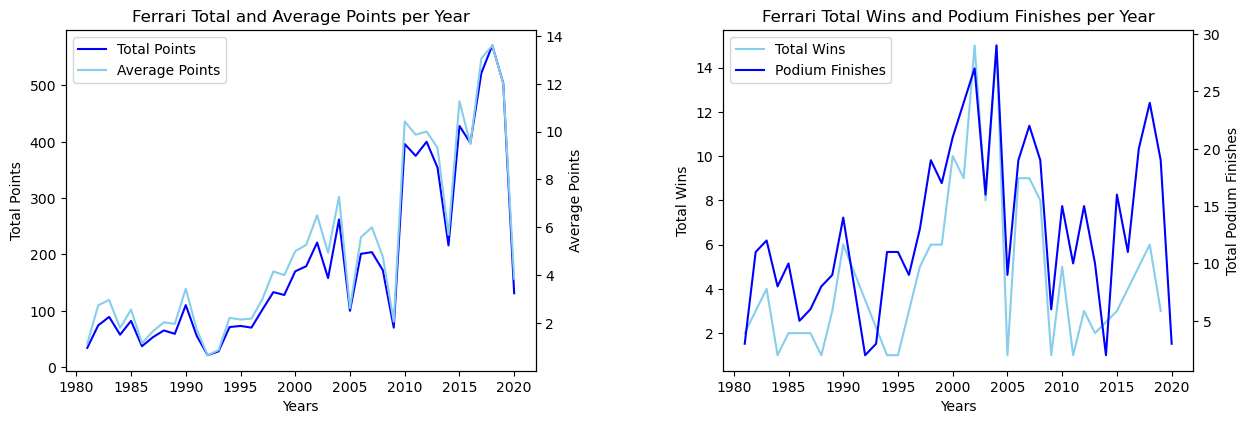

In [192]:
# Creating a plot with 1 row, 2 columns
fig, list_subfig = plt.subplots(1, 2,figsize = (12,4))

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace = 0.3)

# First Subfigure (Total and Average Points by Year)
lines = list_subfig[0]
lines_1, = lines.plot(points_by_year['year'], points_by_year['total_points_by_year'], color='blue', label = 'Total Points')
lines.set_xlabel('Years')
lines.set_ylabel('Total Points')
lines.tick_params(axis='y')

lines2 = lines.twinx()
lines_2, = lines2.plot(points_by_year['year'], points_by_year['avg_points_by_year'], color='skyblue', label='Average Points')
lines2.set_ylabel('Average Points')
lines2.tick_params(axis='y')

list_subfig[0].set_title('Ferrari Total and Average Points per Year')
lines.legend(handles=[lines_1, lines_2], loc='upper left')

# Second Subfigure (Total Wins and Podium Finishes by Year)
lines3 = list_subfig[1]
lines_3, = lines3.plot(wins_by_year['year'], wins_by_year['total_wins_by_year'], color='skyblue', label = 'Total Wins')
lines3.set_xlabel('Years')
lines3.set_ylabel('Total Wins')
lines3.tick_params(axis='y')

lines4 = lines3.twinx()
lines_4, = lines4.plot(podium_finishes_by_year['year'], podium_finishes_by_year['total_podiums_by_year'], color='blue', label='Podium Finishes')
lines4.set_ylabel('Total Podium Finishes')
lines4.tick_params(axis='y')
list_subfig[1].set_title('Ferrari Total Wins and Podium Finishes per Year')

lines4.legend(handles=[lines_3, lines_4], loc='upper left')


plt.show()

**Findings**
- From the plots above, Ferrari's total points and average points peaked between 2015 and 2020. However, Ferrari's number of wins and number of podium finishes was the highest between 2000 and 2005. 
- This is likely due to the fact that the point system changed over the years, therefore, points might not be the best metric to use for the comparison.
- Next, I will look at the wins and podium finishes between 2000 and 2005, and look at these relative to the number of races in each year

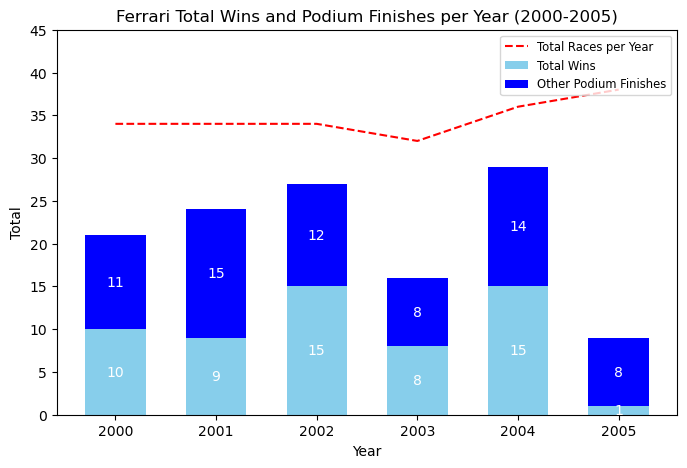

In [173]:
# Set the width for the bars
bar_width = 0.6

# Create a figure and axis
fig, list_subfig = plt.subplots(figsize=(8, 5))


remaining_podiums = podium_finishes_by_year.query("(year >= 2000) & (year <= 2005)").reset_index()['total_podiums_by_year'] - wins_by_year.query("(year >= 2000) & (year <= 2005)").reset_index()['total_wins_by_year']

# Create the stacked bars
bars_wins = list_subfig.bar(wins_by_year.query("(year >= 2000) & (year <= 2005)")['year'], wins_by_year.query("(year >= 2000) & (year <= 2005)")['total_wins_by_year'], width=bar_width, color='skyblue', label='Total Wins')
bars_podiums = list_subfig.bar(podium_finishes_by_year.query("(year >= 2000) & (year <= 2005)")['year'], remaining_podiums, width=bar_width, color='blue', label='Other Podium Finishes', bottom=wins_by_year.query("(year >= 2000) & (year <= 2005)")['total_wins_by_year'])

# Overlay the total races as a line plot
list_subfig.plot(races_per_year.query("(year >= 2000) & (year <= 2005)")['year'], races_per_year.query("(year >= 2000) & (year <= 2005)")['total_races_per_year'], linestyle='--', label='Total Races per Year', color='red')

# Add labels, title, and legend
list_subfig.set_xlabel('Year')
list_subfig.set_ylabel('Total')
list_subfig.set_title('Ferrari Total Wins and Podium Finishes per Year (2000-2005)')
list_subfig.legend(loc='upper right', fontsize = 'small')
list_subfig.set_ylim(0, 45)


# Add the data labels on the stacked bars
for bar_wins, bar_podiums in zip(bars_wins, bars_podiums):
    yval_wins = bar_wins.get_height()  
    yval_podiums = bar_podiums.get_height()  
    list_subfig.text(bar_wins.get_x() + bar_wins.get_width()/2, yval_wins / 2, f'{yval_wins:,.0f}', ha='center', va='center', fontsize=10, color='white')  
    list_subfig.text(bar_podiums.get_x() + bar_podiums.get_width()/2, yval_wins + yval_podiums / 2, f'{yval_podiums:,.0f}', ha='center', va='center', fontsize=10, color='white')  

plt.show()

In [ ]:

# Querying for just years between 1981 and 2020, aggregating points by constructorId, and sorting by total points by constructor 
# Note: I am also getting the number of distinct years that each constructor competed during the time frame 
drivers_ferrari_1981_2020 = (results_merged.query("(year >= 1981) & (year <= 2020) & (name == 'Ferrari')"))['fullName'].nunique()

print("Unique Ferrari drivers between 1981 and 2020: ", drivers_ferrari_1981_2020)

In [29]:
# Note: using constructors_agg from question a

# Querying for just years between 2001 and 2020, aggregating points by constructorId, and sorting by total points by constructor 
# Note: I am also getting the number of distinct years that each constructor competed during the time frame 
constructor_points_2001_2020 = (constructors_agg.query("(year >= 2001) & (year <= 2020)").groupby(["constructorId", "name"]).agg(total_points_2001_2020 = ('points_by_year','sum'), distinct_years = ('year', 'nunique')).sort_values(by = 'total_points_2001_2020', ascending = False)).reset_index()


Note: 
- Will be using analysis from questions a and b to answer question c
- Will be using results_merged to compute question d directly


#### Question e



There are a few different metrics I want to look at to determine Ferrari's best year between 1981 and 2020:
- Total number of points accumulated in each year - directly indicates performance in each season
- Average number of points per race in each year 
- The number of races won in each year (also show relative to total races) - measure of dominance
- The number of total podium finishes in each year (also show relative to total races) - measure of consistency 
- The fastestLap for each year - could be an indicator of Ferrari's potential speed

##### Creating data frame

### Answers

McLaren dropped out of the top three during the 2001-2020 time period, while Red Bull entered the top 3 taking 3rd place. 

Ferrari remained the top constructor between both time periods, though they appear to be less dominant in the 2001-2020 time period.

Mercedes' total points remained the same between both time periods because they only started competing in 2010, which makes sense why the gap of total points from Ferrari decreased in the 2001-2020 time period since the number of years competing between the two constructors are becoming more similar. 

## Question d

In [ ]:

# Querying for just years between 1981 and 2020, aggregating points by constructorId, and sorting by total points by constructor 
# Note: I am also getting the number of distinct years that each constructor competed during the time frame 
drivers_ferrari_1981_2020 = (results_merged.query("(year >= 1981) & (year <= 2020) & (name == 'Ferrari')"))['fullName'].nunique()

print("Unique Ferrari drivers between 1981 and 2020: ", drivers_ferrari_1981_2020)
                                                   



### Answers

There were 25 different drivers for Ferrari between 1981 and 2020